In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpmd_api as io

In [2]:
series = io.Series("diags/openPMD/monitor.h5", io.Access.read_only)

In [3]:
iterations = list(series.iterations)

In [4]:
len(iterations)

50

In [5]:
# OK, 10 iterations for 10 turns in simulation

In [6]:
print(iterations)

[1, 27, 53, 79, 105, 131, 157, 183, 209, 235, 261, 287, 313, 339, 365, 391, 417, 443, 469, 495, 521, 547, 573, 599, 625, 651, 677, 703, 729, 755, 781, 807, 833, 859, 885, 911, 937, 963, 989, 1015, 1041, 1067, 1093, 1119, 1145, 1171, 1197, 1223, 1249, 1275]


In [7]:
# what are these numbers?
# there are five elements in the beamline, each had nslice=25
# 1 after monitor, + 5*25+1 + 5*25+1 + 5*25+1?

In [8]:
itest = []
i = 0
for r in range(10):
    i = i + 1
    itest.append(i)
    for s in range(5):
        i = i + 25
print(itest)

[1, 127, 253, 379, 505, 631, 757, 883, 1009, 1135]


In [9]:
# OK now I know what they are

In [10]:
# Look at reduced beam quantties for each iteration

In [11]:
std_x = []
std_y = []
for i in iterations:
    std_x.append(series.iterations[i].particles['beam'].get_attribute('sig_x'))
    std_y.append(series.iterations[i].particles['beam'].get_attribute('sig_y'))

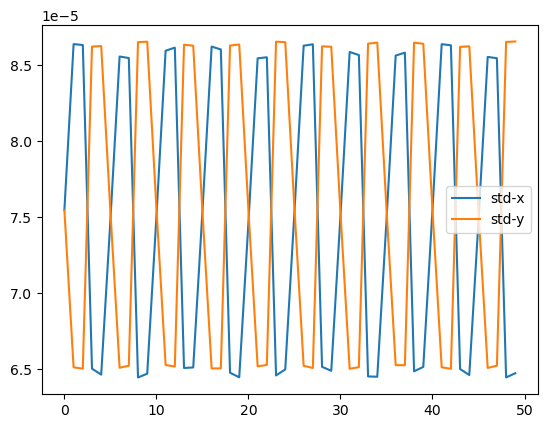

In [12]:
plt.plot(std_x, label='std-x')
plt.plot(std_y, label='std-y')
plt.legend(loc='best')

In [13]:
#series.close()

In [14]:
# How many particles are in the diagnostics?
beams_df = []
for i in iterations:
    beams_df.append(series.iterations[i].particles['beam'].to_df())

In [15]:
beams_df[0]['position_x'].shape

(10000,)

In [16]:
emit_x = []
emit_y = []
beta_x = []
beta_y = []
for i in iterations:
    emit_x.append(series.iterations[i].particles['beam'].get_attribute('emittance_x'))
    beta_x.append(series.iterations[i].particles['beam'].get_attribute('beta_x'))
    emit_y.append(series.iterations[i].particles['beam'].get_attribute('emittance_y'))
    beta_y.append(series.iterations[i].particles['beam'].get_attribute('beta_y'))    

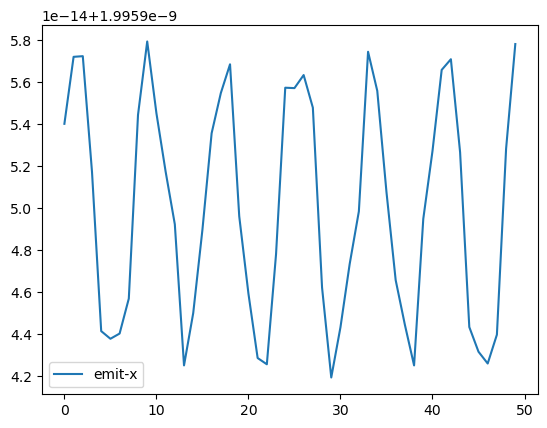

In [17]:
plt.plot(emit_x, label='emit-x')
plt.legend(loc='best')

In [18]:
emit_x

[1.9959540205161694e-09,
 1.9959572087316674e-09,
 1.995957239735722e-09,
 1.995951733488589e-09,
 1.9959441551248328e-09,
 1.9959437906254414e-09,
 1.995944038951075e-09,
 1.995945703103004e-09,
 1.9959544460373814e-09,
 1.9959579393334795e-09,
 1.995954526283722e-09,
 1.995951748785015e-09,
 1.9959492393281915e-09,
 1.9959425233687738e-09,
 1.995945013585311e-09,
 1.9959489793737783e-09,
 1.995953572199934e-09,
 1.9959554843496676e-09,
 1.995956853740168e-09,
 1.9959496208216e-09,
 1.995945939140414e-09,
 1.9959428738626855e-09,
 1.9959425763509547e-09,
 1.995947815201391e-09,
 1.9959557387166204e-09,
 1.9959557201004377e-09,
 1.9959563416186163e-09,
 1.9959547901220294e-09,
 1.9959462302511125e-09,
 1.995941948322597e-09,
 1.9959443376885893e-09,
 1.9959473440455647e-09,
 1.9959498536929543e-09,
 1.99595744951597e-09,
 1.995955589923006e-09,
 1.995950773288799e-09,
 1.995946582858268e-09,
 1.995944457298443e-09,
 1.995942522888387e-09,
 1.9959494957352348e-09,
 1.9959527232844956e-0